In [1]:
import pandas
%matplotlib inline

In [2]:
titanic = pandas.read_csv('titanic.csv')

In [3]:
titanic.mean()

/tmp/ipykernel_560/929819788.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [4]:
# The overall mean survival rate for all passengers
titanic.Survived.mean()

0.3838383838383838

In [5]:
# groupby the passenger's gender so as to compute the mean survival rate separately for males and females
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
# Compute the mean survival rate for each class of passenger
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [7]:
# group by both Sex and passenger class to compute the mean survival rate for each combination of Sex and Passenger class
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [8]:
# Compute a new column named 'Child' which is equal to 'child' if age is less than 18, or 'adult' otherwise
titanic.loc[titanic.Age < 18, 'Child'] = 'child'
titanic.loc[titanic.Age >= 18, 'Child'] = 'adult'

In [9]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult


In [10]:
# Is it true that women and children were given priority boarding the life boats?
titanic.groupby(['Sex', 'Child'])['Survived'].mean()

Sex     Child
female  adult    0.771845
        child    0.690909
male    adult    0.177215
        child    0.396552
Name: Survived, dtype: float64

<AxesSubplot:>

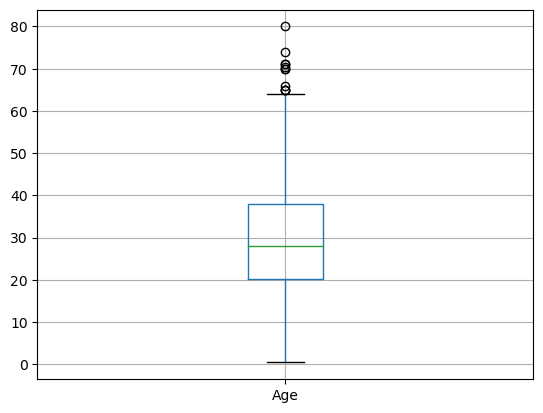

In [11]:
# Create a box plot for all passenger ages
titanic[['Age']].boxplot()

female         AxesSubplot(0.1,0.15;0.363636x0.75)
male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

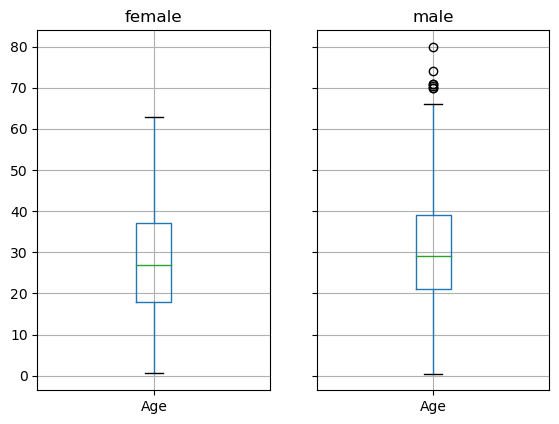

In [12]:
# Create a separate box plot for the age if males and females separately
titanic.groupby('Sex')[['Age']].boxplot()

In [13]:
# Compute the mean age, survival rate and fare for each gender
titanic.groupby('Sex')[['Age', 'Survived', 'Fare']].mean()

,Age,Survived,Fare
Sex,,,
female,27.915709,0.742038,44.479818
male,30.726645,0.188908,25.523893


In [14]:
# Equivalently, using the agg method to apply the mean function
titanic.groupby('Sex')[['Age', 'Survived', 'Fare']].agg('mean')

,Age,Survived,Fare
Sex,,,
female,27.915709,0.742038,44.479818
male,30.726645,0.188908,25.523893


In [15]:
# Compute the mean, min and max of Age, Survived and Fare separately for each gender
titanic.groupby('Sex')[['Age', 'Survived', 'Fare']].agg(['mean', 'min', 'max'])

Age              Survived               Fare                
             mean   min   max      mean min max       mean   min       max
Sex                                                                       
female  27.915709  0.75  63.0  0.742038   0   1  44.479818  6.75  512.3292
male    30.726645  0.42  80.0  0.188908   0   1  25.523893  0.00  512.3292

In [16]:
# Specify a different column name and aggregate operation for each column:
# The avgAge column is the mean Age, the oldest column is the max Age, the passengers  column is the count of PassengerIds and the survived column is the mean survival rate
titanic.groupby('Sex').agg(avgAge = ('Age', 'mean'), oldest = ('Age', 'max'), passengers=('PassengerId', 'count'), survived = ('Survived', 'mean'))

,avgAge,oldest,passengers,survived
Sex,,,,
female,27.915709,63.0,314,0.742038
male,30.726645,80.0,577,0.188908


In [17]:
# Returning to our previous example
titanic.groupby('Sex')[['Age', 'Survived', 'Fare']].agg(['mean', 'min', 'max'])

Age              Survived               Fare                
             mean   min   max      mean min max       mean   min       max
Sex                                                                       
female  27.915709  0.75  63.0  0.742038   0   1  44.479818  6.75  512.3292
male    30.726645  0.42  80.0  0.188908   0   1  25.523893  0.00  512.3292

In [18]:
# The stack method restructures the table by creating one rows for each of (one level of) column labels
titanic.groupby('Sex')[['Age', 'Survived', 'Fare']].agg(['mean', 'min', 'max']).stack()

Age  Survived        Fare
Sex                                         
female mean  27.915709  0.742038   44.479818
       min    0.750000  0.000000    6.750000
       max   63.000000  1.000000  512.329200
male   mean  30.726645  0.188908   25.523893
       min    0.420000  0.000000    0.000000
       max   80.000000  1.000000  512.329200

In [19]:
# The unstack method restructures the table in the other direction converting multiple rows into multiple columns
titanic.groupby('Sex')[['Age', 'Survived', 'Fare']].agg(['mean', 'min', 'max']).unstack(0)

                Sex   
Age       mean  female     27.915709
                male       30.726645
          min   female      0.750000
                male        0.420000
          max   female     63.000000
                male       80.000000
Survived  mean  female      0.742038
                male        0.188908
          min   female      0.000000
                male        0.000000
          max   female      1.000000
                male        1.000000
Fare      mean  female     44.479818
                male       25.523893
          min   female      6.750000
                male        0.000000
          max   female    512.329200
                male      512.329200
dtype: float64

In [20]:
# Try creating some examples of your own ...